In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [3]:
Ex_file = 'housing.csv'
full_data = pd.read_csv(Ex_file)
display (full_data.head())

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [10]:
# TODO: Minimum price of the data
#计算价值最小值
minimum_price = min(prices)

# TODO: Maximum price of the data
#计算价值最大值
maximum_price = max(prices)

# TODO: Mean price of the data
#计算价值平均值
mean_price = np.mean(prices)

# TODO: Median price of the data
#计算价值中值
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
#计算价值标准差
std_price = np.std(prices)

# Show the calculated statistics
#输出计算结果
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477


In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
#随机抽样20%的数据构建测试样本，剩余作为训练样本
X_train,X_test,y_train,y_test=train_test_split(features, prices,random_state=0,test_size=0.20)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

391
98
391
98


In [5]:
import sklearn as skl
def performance_metric(y_true, y_predict):

    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = skl.metrics.r2_score(y_true,y_predict,sample_weight=None,multioutput=None)

    # Return the score
    return score

In [6]:
from sklearn.preprocessing import StandardScaler
#分别初始化对特征值和目标值的标准化器
ss_X = StandardScaler()
ss_y = StandardScaler()
#训练数据都是数值型，所以要标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

In [7]:
import sklearn as skl
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator = regressor,param_grid = params,scoring = scoring_fnc,cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

reg = fit_model(X_train, y_train)

print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [8]:
# TODO Calculate the r2 score between 'y_true' and 'y_predict'

y_predict  = reg.predict(X_test)

score = performance_metric(y_predict, y_test)

print("Optimal model has R^2 score {:,.2f} on test data".format(score))

Optimal model has R^2 score 0.74 on test data


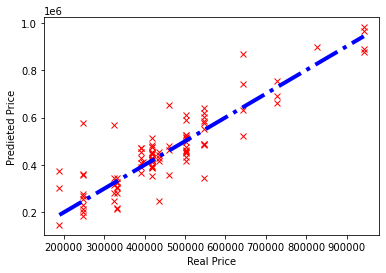

In [9]:
import matplotlib.pyplot as plt
plt.plot(y_predict, y_test, 'rx')# y = ωX
plt.plot([y_predict.min(), y_predict.max()], [y_predict.min(), y_predict.max()], 'b-.', lw=4) # f(x)=x
plt.ylabel("Predieted Price")
plt.xlabel("Real Price")
plt.show()